# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Picart, David Kyle\
_Student No._: 2022-01148\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: Oct. , 2024. pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** David Kyle R. Picart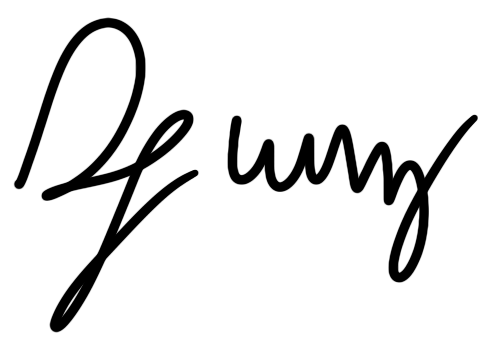

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


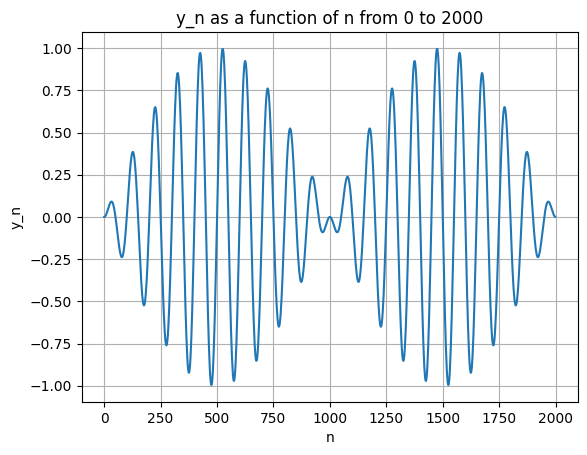

Looking at the plot at the point n=1000, the function clearly has not completed one cycle, as it does not repeat the pattern from n=0. Instead it is reflected along the x-axis
Thus, we need to take twice as many points for the function to be cyclic so that we can take an accurate fourier series.
Another way to find this out without the graph is by examining the first sine term, after n=1000, y=sin(pi)=0 which is only half a cycle.


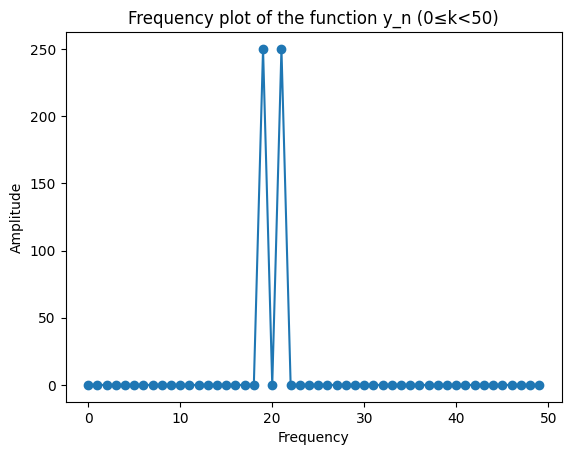

The plot has two spikes around 20 (19 and 21), which are the two frequencies that can be extracted by expanding sinAsinB to 1/2[cos(A-B)-cos(A+B)].
The negative sign for k=21 results in a negative value for c[21], instead the abs value was taken since only the magnitude is important.
The plot is zoomed in to see the freq values better, but the full plot is placed below.


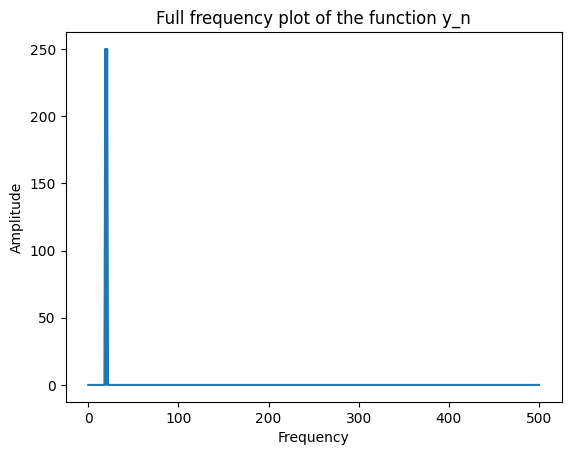

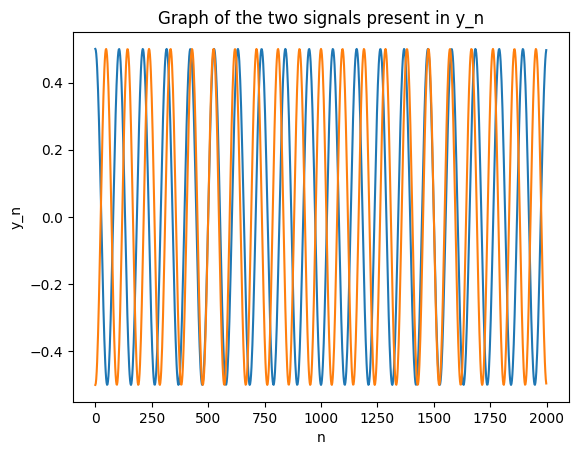

The merged graph is quite messy, but some key features are visible when compared to the first graph
The two graphs were out of phase initially, then in phase at around n=500, then out of phase again in 1000, and so on.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(n):            #define the function
  return np.sin(np.pi*x/N) * np.sin(20*np.pi*x/N)

#define dft from the module
def dft(y):
  N = len(y)
  c = np.zeros(N//2+1, complex) #// floor division
  for k in range(N//2+1):
  #range of k is half the size of the array, since if y is real, the other half is just the complex conj of the first half (i.e. arg of exp term can be substituted with N-n to get c[k_{N-n}]=(c[k_n])*)
    for n in range(N):
      c[k] += y[n] * np.exp(-2j*np.pi*k*n/N)
  return c

a = 0
b = 2000
N = 1000
h = (b-a)/N
x = np.linspace(a,b,N,endpoint=False)
y = f(x)

c = abs(dft(y))  #take abs value to get the magnitude of the signal freq

plt.plot(x,y)   #plot y_n for n from 0->2000
plt.xlabel("n")
plt.ylabel("y_n")
plt.title("y_n as a function of n from 0 to 2000")
plt.grid()
plt.show()
print("Looking at the plot at the point n=1000, the function clearly has not completed one cycle, as it does not repeat the pattern from n=0. Instead it is reflected along the x-axis")
print("Thus, we need to take twice as many points for the function to be cyclic so that we can take an accurate fourier series.")
print("Another way to find this out without the graph is by examining the first sine term, after n=1000, y=sin(pi)=0 which is only half a cycle.")

\
plt.clf()  #clear the figure space
plt.plot(np.arange(0,50),c[:50], 'o-')   #take values from the first 50, the rest are zero
plt.xlabel("Frequency")            #label the figure
plt.ylabel("Amplitude")
plt.title("Frequency plot of the function y_n (0≤k<50)")
plt.show()
print("The plot has two spikes around 20 (19 and 21), which are the two frequencies that can be extracted by expanding sinAsinB to 1/2[cos(A-B)-cos(A+B)].")
print("The negative sign for k=21 results in a negative value for c[21], instead the abs value was taken since only the magnitude is important.")
print("The plot is zoomed in to see the freq values better, but the full plot is placed below.")

\
plt.clf()
plt.plot(np.arange(0,501),c)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Full frequency plot of the function y_n")
plt.show()
print("") #add a space between plots
\
plt.clf()
plt.plot(x, np.cos(19*np.pi*x/N)/2)
plt.plot(x, -np.cos(21*np.pi*x/N)/2)
plt.xlabel("n")
plt.ylabel("y_n")
plt.title("Graph of the two signals present in y_n")
plt.show()
print("The merged graph is quite messy, but some key features are visible when compared to the first graph.")
print("The two graphs were out of phase initially, then in phase at around n=500, then out of phase again in 1000, and so on.")

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive/

 202201148.jpg
'202201148-PICART -- Midyear 2024 Late Registration Letter of Appeal.pdf'
 Classroom
'Colab Notebooks'
'DKPicartLE2 Part 2.pdf'
'Drill 1 part 1.pdf'
'Drill 1 part 2.pdf'
'Drill 2 Picart.pdf'
 driver.jpg
 DTE.pdf
'E11-12 NOTES - DAVID KYLE R. PICART.pdf'
'E8-10 NOTES - DAVID KYLE R. PICART.pdf'
'FORM5_2022-01148-1st Sem 22-23.pdf'
'FORM5_2022-01148-2nd Sem 22-23.pdf'
'FORM_5A_2022-01148_First Semester AY 2022-2023.pdf'
'FORM_5A_2022-01148_Second Semester AY 2022-2023.pdf'
 image_2024-02-14_190842715.png
 image_2024-02-23_010315479.png
 image_2024-03-01_185131473.png
 image_2024-08-08_211759734.png
'PE RF async run'
'PICART_DAVID KYLE_APPEAL FOR LATE REGISTRATION (1).pdf'
'PICART_DAVID KYLE_APPEAL FOR LATE REGISTRATION.pdf'
'Picart_David Kyle_FORM5.pdf'
'PICART, David Kyle.png'
 Picart_DTE.pdf
'Picart_E11 DTE.pdf'
'Picart_E12 DTE.pdf'
'Picart_E6 DTE.pdf'
'Picart_E7 DTE.pdf'
'Picart_Exercise 3-10.jpg'
'Picart_Exercise 3-8.jpg'
'Picart_LE 1.pdf'
'Picart_LE2 MCQ.pdf'
'Picart 

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/Storage/3rd year/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

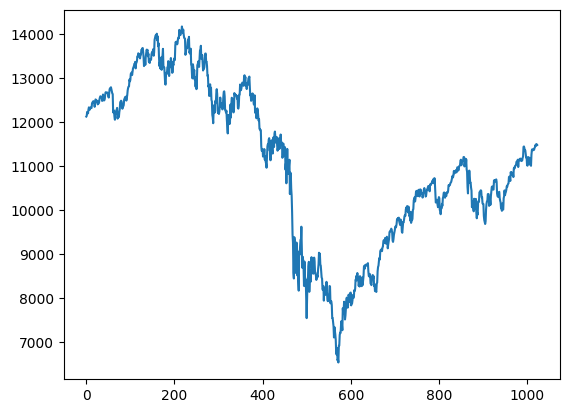

The graph is very erratic and unpredictable, which is hard to interpret and extrapolate to predict future trends


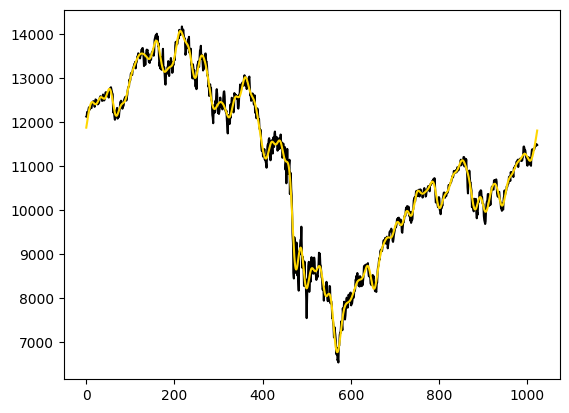

The overlaid graph appears like a smoothened version of the initial graph. This removed the more volatile, high frequencies.
The lower highest frequency also implies that the sampling rate is less frequent, which can be analogous to measuring trends monthly instead of daily.


In [ ]:
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft
'''
#1
'''
plt.plot(dow)             #plot dow
plt.show()

'''
#2
'''
c = np.array(0,complex)   #initialize a complex array to remove datatype error
c = rfft(dow)             #use rfft function, which takes real function input and uses the symmetry to evaluate only half the frequencies given by N//2+1

print("The graph is very erratic and unpredictable, which is hard to interpret and extrapolate to predict future trends")

'''
#3
'''
N = len(c)//10            #use floor division to yield an integer for indexing
c1 = np.zeros(len(c),complex)     #create a zero matrix with same dimension as c
c1[:N] = c[:N]            #copy values from 0 to N

'''
#4
'''
dow1 = irfft(c1)          #apply inverse fft

plt.plot(dow, 'black')    #choose colors that have good contrast
plt.plot(dow1, 'gold')
plt.show()

print("The overlaid graph appears like a smoothened version of the initial graph. This removed the more volatile, high frequencies.")
print("The lower highest frequency also implies that the sampling rate is less frequent, which can be analogous to measuring trends monthly instead of daily.")